# Use
This notebook will be used to tests the functions of the python file `hungarian.py`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from warnings import warn
%load_ext autoreload
%autoreload 2

from hungarian import preprocess, alternate, hungarian, hungarian3, augment
from transport import gaussian_transport, gaussian_discreatization

rng = np.random.default_rng(4321)

# `hungarian.py`
## `preprocess(C)`

In [2]:
n=4
C = np.random.random(size=(n,n))
n,U,V,row,x = preprocess(C)
print(C-U[:,np.newaxis]-V,"\n",x)

[[0.35522833 0.53503135 0.         0.34808266]
 [0.         0.66390927 0.79669703 0.18916636]
 [0.6422562  0.85821807 0.8605086  0.        ]
 [0.18379849 0.         0.57654338 0.07873784]] 
 [[False False  True False]
 [ True False False False]
 [False False False  True]
 [False  True False False]]


In [3]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,5,7],
              [1,6,6,9],
              [3,6,2,2]])
n,U,V,row,x = preprocess(C)
print(C-U[:,np.newaxis] - V, row, U, V,"\n", x)

[[0 0 1 2]
 [0 4 3 5]
 [0 3 5 8]
 [1 2 0 0]] [0 None 3 None] [7 2 1 2] [0 2 0 0] 
 [[ True False False False]
 [False False False False]
 [False False False False]
 [False False  True False]]


seem ok
- The zero entries match the True entries
- Internal assertions satisfied
- Same results as exemple 4.3
## `alternate(C,U,V,row,k)`

In [5]:
n=4
C = np.random.randint(10,size=(n,n))
n,U,V,row,x = preprocess(C)
k=n-1
if np.any(row==k):
     print("Invalid candidate k, try again")
else:
    sink,pred,SU,LV = alternate(C,U,V,row,k)
    print(row)
    print(sink,pred,SU,LV)
    print(C-U[:,np.newaxis]-V)

[2 1 0 None]
None [None 3 None None] [False  True False  True] [False  True False False]
[[3 6 0 1]
 [6 0 5 3]
 [0 1 4 0]
 [5 0 7 4]]


In [6]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,6,7],
              [1,6,6,9],
              [3,6,2,2]])
n,U,V,row,x = preprocess(C)
k=1
sink,pred,SU,LV = alternate(C,U,V,row,k)
print(sink,pred)

1 [1 0 None None]


## `hungarian(C)`

In [7]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,6,7],
              [1,6,6,9],
              [3,6,2,2]])
row,x,phi,U,V,W = hungarian(C)
print(row,phi,U,V)
print(1*x)

hungarian succed (feasibility and complementary slackness holds)
[2 0 1 3] [1 2 0 3] [8 6 5 2] [-4  1  0  0]
[[0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]


In [13]:
# random integer
n=10
C = np.random.randint(1,10,(n,n))
row,x,phi,U,V, W = hungarian(C)
print(row,phi,U,V)

hungarian succed (feasibility and complementary slackness holds)
[3 7 0 6 8 4 2 5 9 1] [2 9 6 0 5 7 3 1 4 8] [3 2 2 3 1 2 2 4 2 2] [ 0  0 -1  0  1  0 -1  0  0  0]


In [14]:
# random gaussian
n=4
C = np.random.random(size=(n,n))
row,x,phi,U,V,W = hungarian(C)
print(C)
print(C-U[:,np.newaxis]-V)
print(row,phi,U,V)
print(1*x)

hungarian succed (feasibility and complementary slackness holds)
[[0.25074261 0.10460634 0.63466663 0.4929945 ]
 [0.77986026 0.65830441 0.4814987  0.42741248]
 [0.11655867 0.35406757 0.10835841 0.62601624]
 [0.24139934 0.52589899 0.05450634 0.70020943]]
[[0.13793602 0.         0.5300603  0.38838817]
 [0.34424753 0.23089193 0.05408622 0.        ]
 [0.         0.24570916 0.         0.51765783]
 [0.17869274 0.47139265 0.         0.64570309]]
[2 0 3 1] [1 3 0 2] [0.10460634 0.42741248 0.10835841 0.05450634] [0.00820026 0.         0.         0.        ]
[[0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]


In [18]:
# random gaussian
n=10
d=10
a=np.random.randn(d,n)
b=np.random.randn(d,n)
C = np.sum((a[:,:,np.newaxis]-b[:,np.newaxis,:])**2,axis=0)
#print(C)
row,x,phi,U,V,W = hungarian(C)
#print(C-U[:,np.newaxis]-V)
#print(row,phi,U,V)
#print(1*x)

hungarian succed (feasibility and complementary slackness holds)


## Questions/remarks
- We must test the **scalar equality** $u_i+v_j=c_{ij}$ multiple times, for now done with a tolerance of proximity but it's not very absolute and strong. How resolve? Solutions:
    - Use integers by **rescaling**.(the more we rescale the slower it becomes)
    - During the dual updating, **save the index** where the constrain is becoming active (by saving the argmin, see how to do it)
    
    -> it is indeed true with tolerance but wont affect the convergence of the algorithm neither the final output significantly

- implementation of **sets** by **vectors**. Better by python sets?

    -> we'll see, not so bad 

- describe the functionment of algorithm? a sketch of background?

    -> yes, sketch the idea, describe the steps, invariants, stopping situation.

- with floats, there is sometimes a small transgression of the dual feasibility, has been dealed by adding a tolerance `tol=1e-5`.

## `augment()`

In [22]:
n=4
C = np.random.randint(10,size=(n,n))
n,U,V,row,x = preprocess(C)
k=n-1
if np.any(row==k):
     print("Invalid candidate k, try again")
else:
    sink,pred,U,V = augment(C,U,V,row,k)
    print(sink,pred,U,V)
    print(C-U[:,np.newaxis]-V)

2 [3 3 2 2] [0 0 2 1] [0 1 4 0]
[[8 0 2 0]
 [1 5 1 0]
 [0 6 0 7]
 [0 3 4 8]]


## `hungarian3()`

In [23]:
# Exemple 4.3
n=4
C = np.array([[7,9,8,9],
              [2,8,6,7],
              [1,6,6,9],
              [3,6,2,2]])
row,x,phi,U,V,W = hungarian3(C)
print(row,phi,U,V)
print(1*x)

hungarian3 succed (feasibility and complementary slackness holds)
[1 2 0 3] [2 0 1 3] [8 6 5 2] [-4  1  0  0]
[[0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]


In [110]:
n=100 # sometimes fails with n>120 
C = np.random.randint(n,size=(n,n))
row,x,phi,U,V,W = hungarian3(C,tol=1e-10)

hungarian3 succed (feasibility and complementary slackness holds)


# `transport.py`
## `gaussian_transport()`

In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from transport import gaussian_transport, gaussian_discreatization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
rng = np.random.default_rng(1234)
d = 2
n=200
mean1, mean2 = rng.normal(size=d), rng.normal(size=d)
A1, A2 = rng.normal(size=(d,d)), rng.normal(size=(d,d))
ii=np.arange(d)
jj=np.arange(d)[:,np.newaxis]
A1[ii-jj<0] = 0
A1[ii-jj==0] = np.abs(A1[ii-jj==0])

cov1, cov2 = A1.T @ A1, A2.T @ A2
transport, W_true = gaussian_transport(mean1, cov1, mean2, cov2)
mu, nu, C = gaussian_discreatization(mean1, cov1, mean2, cov2, n, rng)

plt.plot(mu[:,0],mu[:,1],'.')
plt.title("Gaussian discretization, cond(cov1)="+str(np.linalg.cond(cov1)))
plt.figure()
plt.plot(nu[:,0],nu[:,1],'.')
plt.title("Gaussian discretization, cond(cov2)="+str(np.linalg.cond(cov2)))

NameError: name 'np' is not defined

In [23]:
row,x,phi,U,V, W_hungarian = hungarian3(C)

W_true = 12.335656211057998
W_hungarian = 13.043107771258878
Error = 0.7074515602008802
cond(cov1)= 151.74439254233616 cond(cov12)= 3.5714595749639844


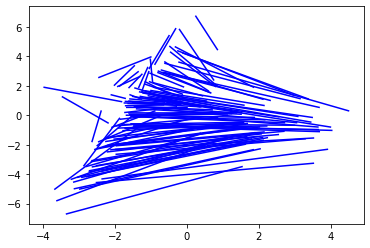

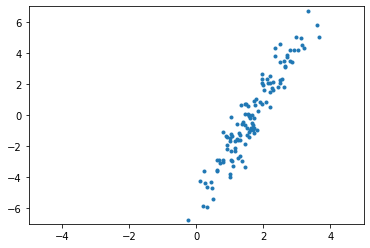

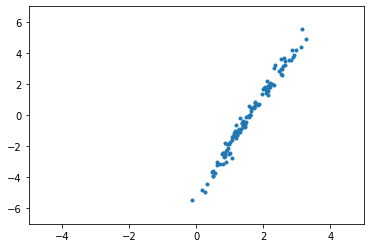

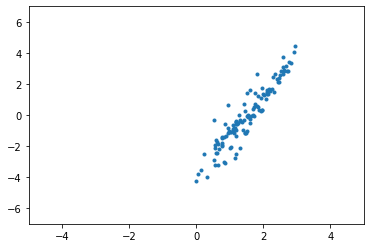

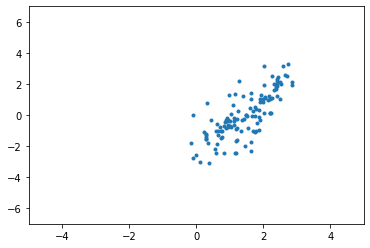

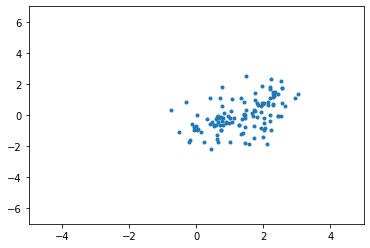

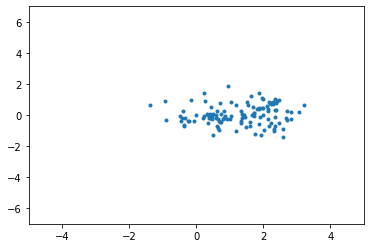

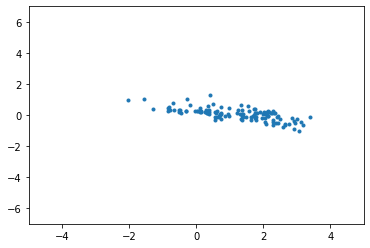

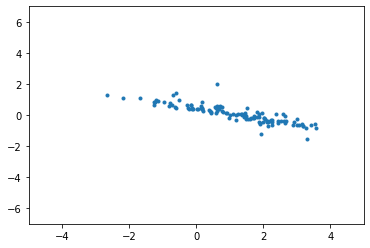

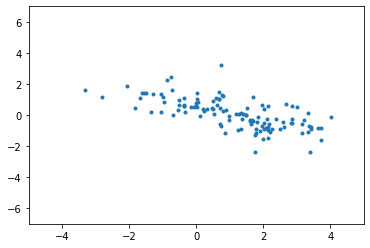

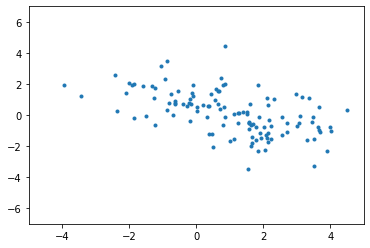

In [19]:
print("W_true =",W_true)
#transported_mu = np.array([transport(mu[:,i] for i in range(n))]).T
#W_true_discretized = np.sum((mu[:,np.newaxis,:] - transported_mu)**2, axis=2) / n
print("W_hungarian =",W_hungarian)
print("Error =",W_hungarian-W_true)
print("cond(cov1)=",np.linalg.cond(cov1),"cond(cov12)=",np.linalg.cond(cov2))

plt.plot([mu[:,0],nu[phi,0]],[mu[:,1],nu[phi,1]],'blue')

for t in np.linspace(0,1,10):
    plt.figure()
    xx = (t-1)*mu[:,0] + t*nu[phi,0]
    yy = (t-1)*mu[:,1] + t*nu[phi,1]
    plt.xlim((-5,5))
    plt.ylim((-7,7))
    plt.plot(xx,yy,'.')